In [71]:
import pandas as pd, re
from unidecode import unidecode
import warnings, numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
def limpiar_nombre(nombre):
    # 1. Eliminar texto entre paréntesis
    nombre = re.sub(r"\(.*?\)", "", nombre)
    # 2. Strip de espacios
    # 3. Convertir a ASCII
    nombre = unidecode(nombre)
    # 4. Eliminar todo lo que no sea alfanumérico o espacio
    nombre = re.sub(r"[^a-zA-Z0-9\s]", "", nombre)
    # 5. Reemplazar múltiples espacios por uno solo
    nombre = re.sub(r"\s+", " ", nombre)
    nombre = nombre.strip().lower()
    return nombre
# limpiar_nombre('CHEN FORESTAL SELVA S.A.C.(B)')
limpiar_nombre('ALARCON SULLA ALEJANDRINA(B)')

'alarcon sulla alejandrina'

In [130]:
candidatos_all = pd.read_csv(r'E:\All\infogob_data_peru\data\02_resultados\todas_elecciones.csv')
infractores = pd.read_csv(r'data\raw\infractores_historial.csv')
infractores = infractores.drop(columns='numero')


In [118]:
infractores.shape, candidatos_all.shape

((183238, 7), (584685, 34))

In [105]:
infractores.head(2)

,infractor,documento_identidad,titulo_habilitante,resolucion_sancionadora,fecha_resolucion,organo_sancionador,ambito_infraccion
0,ABANO VEINTEMILLA JONATHAN,04963135,GOREMAD-GRRNYGA-DRFFS/DFFS-TAH/P-MAD-D-26-14,RD N° 475-2016-OSINFOR-DSPAFFS,13/09/2016,OSINFOR,GORE Madre de Dios
1,ABANO VEINTEMILLAS ANGEL DANIEL,05061884,NaN,RDR N° 408-2015-GOREMAD-GRRNYGA-DRFFS-DFFS-TAH,31/08/2015,ARFFS,GORE Madre de Dios


# limpiamos los nombres


limpiando los nombres para que puedan coincidir en los infractores

In [106]:
names_doc_infractores = infractores[['infractor', 'documento_identidad']]
names_doc_infractores['infractor'] = names_doc_infractores['infractor'].astype(str).fillna("").apply(limpiar_nombre)
names_doc_infractores['infractor'] = names_doc_infractores['infractor'].apply(limpiar_nombre)
names_doc_infractores = names_doc_infractores.drop_duplicates()
names_doc_infractores.head()

,infractor,documento_identidad
0,abano veintemilla jonathan,04963135
1,abano veintemillas angel daniel,05061884
2,abanto huaccha eleuterio olegario,00067690
3,abanto vargas maria del carmen,27906159
4,abensur reategui luz patricia martina,47478469


candidatos

In [107]:

candidatos_names = candidatos_all[['name_candidato']].drop_duplicates()
candidatos_names['candidato_name'] = candidatos_names['name_candidato'].apply(limpiar_nombre)
candidatos_names.head()

,name_candidato,candidato_name
0,MIGUEL CATALINO REYES CONTRERAS,miguel catalino reyes contreras
1,ROMULO HUMBERTO MERINO IZQUIERDO,romulo humberto merino izquierdo
2,LEOPOLDO VILLANUEVA MALLQUI,leopoldo villanueva mallqui
3,FRANCISCA FLORES SILVA MEDINA,francisca flores silva medina
4,HANERTH ERNESTINA CORNEJO DE QUIROZ,hanerth ernestina cornejo de quiroz


# Generamos los datos que comparten

In [108]:
candidatos_infractores = pd.merge(names_doc_infractores, candidatos_names, left_on='infractor', right_on='candidato_name', how='inner')
candidatos_infractores.head()

,infractor,documento_identidad,name_candidato,candidato_name
0,adan gutierrez gomez,21444346,ADAN GUTIERREZ GOMEZ,adan gutierrez gomez
1,alejandro berrocal velasquez,05061581,ALEJANDRO BERROCAL VELASQUEZ,alejandro berrocal velasquez
2,angel augusto cespedes tapia,04819989,ANGEL AUGUSTO CESPEDES TAPIA,angel augusto cespedes tapia
3,ciro simeon cuadros velarde,19936832,CIRO SIMEON CUADROS VELARDE,ciro simeon cuadros velarde
4,eladio diaz avellaneda,27686514,ELADIO DIAZ AVELLANEDA,eladio diaz avellaneda


In [237]:
info_cols_candidatos = ['eleccion_name', 'type', 'cargo_postula', 'cargo_electo', 'name_candidato']
info_candidatos = candidatos_all[info_cols_candidatos].drop_duplicates()
info_candidatos['candidato_name'] = info_candidatos['name_candidato'].apply(limpiar_nombre)
candidatos_elecciones = candidatos_infractores.merge(info_candidatos)[info_cols_candidatos + ['documento_identidad']]
candidatos_elecciones

,eleccion_name,type,cargo_postula,cargo_electo,name_candidato,documento_identidad
0,ELECCIONES REGIONALES Y MUNICIPALES 2022 - MUN...,provincial,REGIDOR PROVINCIAL,NO ELECTO,ADAN GUTIERREZ GOMEZ,21444346
1,ELECCIONES REGIONALES Y MUNICIPALES 2002 - MUN...,provincial,REGIDOR PROVINCIAL,NO ELECTO,ALEJANDRO BERROCAL VELASQUEZ,05061581
2,ELECCIONES REGIONALES Y MUNICIPALES 2010 - MUN...,provincial,REGIDOR PROVINCIAL,NO ELECTO,ALEJANDRO BERROCAL VELASQUEZ,05061581
3,ELECCIONES REGIONALES Y MUNICIPALES 2002 - MUN...,distrital,REGIDOR DISTRITAL,NO ELECTO,ANGEL AUGUSTO CESPEDES TAPIA,04819989
4,ELECCIONES REGIONALES Y MUNICIPALES 2018 - MUN...,distrital,REGIDOR DISTRITAL,NO ELECTO,ANGEL AUGUSTO CESPEDES TAPIA,04819989
...,...,...,...,...,...,...
108,ELECCIONES REGIONALES Y MUNICIPALES 2006 - MUN...,distrital,REGIDOR DISTRITAL,NO ELECTO,EDGAR UMERES MEJIA,23986878
109,ELECCIONES REGIONALES Y MUNICIPALES 2002 - MUN...,distrital,REGIDOR DISTRITAL,NO ELECTO,DARWIN HENRIK RUFFNER LAGRAVERE,04306911
110,ELECCIONES REGIONALES Y MUNICIPALES 2010 - MUN...,distrital,ALCALDE DISTRITAL,NO ELECTO,CAMILO PILLPE CEDANO,09355179
111,ELECCIONES REGIONALES Y MUNICIPALES 2014 - MUN...,distrital,ALCALDE DISTRITAL,NO ELECTO,CAMILO PILLPE CEDANO,09355179


In [234]:
candidatos_elecciones.value_counts('cargo_electo').reset_index()

,cargo_electo,count
0,NO ELECTO,96
1,REGIDOR DISTRITAL,10
2,ALCALDE PROVINCIAL,2
3,ALCALDE DISTRITAL,2
4,REGIDOR PROVINCIAL,2
5,CONSEJERO REGIONAL,1


In [239]:
infractor_fue_electo = candidatos_elecciones.query('cargo_electo != "NO ELECTO"')


# Limpiamos para las estadisticas

In [245]:
fue_candidato = np.where(infractores['documento_identidad'].isin(candidatos_infractores['documento_identidad']), 1, 0)
fue_electo = np.where(infractores['documento_identidad'].isin(infractor_fue_electo['documento_identidad']), 1, 0)
infractores['fue_candidato'] = fue_candidato
infractores['fue_electo'] = fue_electo
df = infractores[['infractor', 'documento_identidad', 'resolucion_sancionadora', 'fecha_resolucion', 'organo_sancionador', 'ambito_infraccion', 'fue_candidato', 'fue_electo']]
# df['infractor'] = df['infractor'].astype(str).fillna("").apply(limpiar_nombre)

cols_duplicates = ['resolucion_sancionadora', 'organo_sancionador', 'ambito_infraccion']
for c in cols_duplicates:
    df[c] = df[c].astype(str).fillna('').apply(limpiar_nombre)
df = df.drop_duplicates(subset=cols_duplicates)
df['ambito_infraccion'] = df['ambito_infraccion'].astype(str).fillna("").apply(limpiar_nombre)
df['fecha_resolucion'] = pd.to_datetime(df['fecha_resolucion'], dayfirst=True)
df = df[df['fecha_resolucion'].dt.year > 2000]
print(df.shape)


(8700, 8)


# Estadisticas

In [242]:
infracciones_por_dni = df['documento_identidad'].value_counts()

# Calcular percentil 99
p99 = infracciones_por_dni.quantile(0.99)

# Filtrar datos
infracciones_filtradas = infracciones_por_dni[infracciones_por_dni <= p99]

# Estadísticas de los datos filtrados
stats_filtradas = infracciones_filtradas.describe(percentiles=[.25, .5, .75, .95])

tabla_filtrada_markdown = f"""
| Estadística (excluyendo top 1%) | Valor |
|--------------------------------|-------|
| Total infractores considerados | {stats_filtradas['count']:.0f} |
| Media | {stats_filtradas['mean']:.2f} |
| Desviación estándar | {stats_filtradas['std']:.2f} |
| Mínimo | {stats_filtradas['min']:.0f} |
| Percentil 25% | {stats_filtradas['25%']:.0f} |
| Mediana (50%) | {stats_filtradas['50%']:.0f} |
| Percentil 75% | {stats_filtradas['75%']:.0f} |
| Percentil 95% | {stats_filtradas['95%']:.0f} |
| Máximo (P99) | {p99:.0f} |
"""

print(tabla_filtrada_markdown)


| Estadística (excluyendo top 1%) | Valor |
|--------------------------------|-------|
| Total infractores considerados | 5640 |
| Media | 1.44 |
| Desviación estándar | 0.87 |
| Mínimo | 1 |
| Percentil 25% | 1 |
| Mediana (50%) | 1 |
| Percentil 75% | 2 |
| Percentil 95% | 3 |
| Máximo (P99) | 6 |



In [244]:
df

,infractor,documento_identidad,resolucion_sancionadora,fecha_resolucion,organo_sancionador,ambito_infraccion,fue_candidato
0,ABANO VEINTEMILLA JONATHAN,04963135,rd ndeg 4752016osinfordspaffs,2016-09-13,osinfor,gore madre de dios,0
1,ABANO VEINTEMILLAS ANGEL DANIEL,05061884,rdr ndeg 4082015goremadgrrnygadrffsdffstah,2015-08-31,arffs,gore madre de dios,0
2,ABANTO HUACCHA ELEUTERIO OLEGARIO,00067690,rde ndeg 4972014grupggrgrdedeffsu,2014-12-04,arffs,gore ucayali,0
3,ABANTO VARGAS MARIA DEL CARMEN,27906159,rd ndeg 5062015osinfordspaffs,2015-08-11,osinfor,atffs cajamarca,0
4,ABENSUR REATEGUI LUZ PATRICIA MARTINA,47478469,ra ndeg 1362015grdrahcoatffstm,2015-04-28,arffs,gore huanuco,0
...,...,...,...,...,...,...,...
111236,JUAN SALVADOR FERROÑAN AGUILAR,47703873,ra ndeg d0000122024midagriserforatffspiura,2024-02-13,arffs,atffs piura,0
111868,OSWALDO CRISANTO RAYMUNDO,43216504,ra d0000092024midagriserforatffspiura,2024-02-08,arffs,atffs piura,0
112377,SANTOS VICTOR JUAREZ ALAMA,42979430,ra ndeg d0000102024midagriserforatffspiura,2024-02-09,arffs,atffs piura,0
122124,ROJAS ROJAS JAVIER,09626999,rd ndeg 7702016osinfordspaffs,2016-12-05,osinfor,atffs selva central,0


In [260]:
infractores_repetitivos = infracciones_por_dni.reset_index().query('count > 6').merge(df)[['documento_identidad', 'infractor', 'count', 'fue_candidato']].drop_duplicates(subset='documento_identidad').sort_values('fue_candidato', ascending=False)
print(infractores_repetitivos.head(10).to_markdown())

|     |   documento_identidad | infractor                                  |   count |   fue_candidato |
|----:|----------------------:|:-------------------------------------------|--------:|----------------:|
| 491 |              41737126 | WILLIAM FIGUEREDO HILHUA                   |       7 |               1 |
|  50 |              05383930 | HUGO PAIMA RIOS                            |      48 |               0 |
|  98 |              04802860 | PIZARRO ATAUSUPA MARIO                     |      33 |               0 |
| 131 |              42013183 | BALSECA VASQUEZ ROBERTO CARLOS             |      28 |               0 |
|   0 |              05200630 | PINEDO RIOS ROLDAN                         |      50 |               0 |
| 186 |           20479541346 | COMUNIDAD CAMPESINA SANTO DOMINGO DE OLMOS |      24 |               0 |
| 210 |              05071906 | DELGADO PANDURO LUIS SANTOS                |      21 |               0 |
| 231 |              41600203 | SABOYA DEL CASTILLO MAN

In [200]:
infractores_repetitivos['count'].sum()
infractores_repetitivos.shape

(45, 4)

In [ ]:
infractores_candidatos = df[df['fue_electo'] == 1].value_counts('documento_identidad').reset_index(name='num_infrac').merge(df)[['documento_identidad', 'infractor', 'num_infrac']].drop_duplicates(subset='documento_identidad')
infracciones_de_electos = infractores_candidatos.merge(df)[['documento_identidad', 'fecha_resolucion', 'organo_sancionador']]
fue_electo_md = infractores_candidatos.merge(infractor_fue_electo).drop(columns=['name_candidato',  'type', 'cargo_postula'])
fue_electo_md = fue_electo_md.merge(infracciones_de_electos).sort_values('documento_identidad')


print(fue_electo_md.to_markdown())

|    |   documento_identidad | infractor                       |   num_infrac | eleccion_name                                                   | cargo_electo       | fecha_resolucion    | organo_sancionador   |
|---:|----------------------:|:--------------------------------|-------------:|:----------------------------------------------------------------|:-------------------|:--------------------|:---------------------|
| 11 |              00010961 | JOSE GONZALES MACEDO            |            1 | ELECCIONES REGIONALES Y MUNICIPALES 2014 - MUNICIPAL DISTRITAL  | REGIDOR DISTRITAL  | 2013-03-12 00:00:00 | osinfor              |
| 10 |              01153127 | JOSE MERCEDES HOYOS MOLOCHO     |            1 | ELECCIONES REGIONALES Y MUNICIPALES 2014 - MUNICIPAL DISTRITAL  | REGIDOR DISTRITAL  | 2024-04-16 00:00:00 | arffs                |
|  0 |              04083308 | GREGORIO MANUEL CALLA ALMONTE   |            2 | ELECCIONES REGIONALES Y MUNICIPALES 2014 - MUNICIPAL DISTRITAL  | REGIDO

In [283]:
con_infracciones_en_funcion= fue_electo_md[fue_electo_md['documento_identidad'].isin(['05868722', '19056841', '44443966'])]
_ = con_infracciones_en_funcion.iloc[[0, 2, 6], :].drop(columns=['num_infrac']).to_markdown()
print(_)

|    |   documento_identidad | infractor                     | eleccion_name                                                  | cargo_electo      | fecha_resolucion    | organo_sancionador   |
|---:|----------------------:|:------------------------------|:---------------------------------------------------------------|:------------------|:--------------------|:---------------------|
| 14 |              05868722 | JOEL DIAZ GARCIA              | ELECCIONES REGIONALES Y MUNICIPALES 2014 - MUNICIPAL DISTRITAL | REGIDOR DISTRITAL | 2015-12-22 00:00:00 | osinfor              |
|  2 |              19056841 | PEDRO NAPOLEON ESPEJO VASQUEZ | ELECCIONES REGIONALES Y MUNICIPALES 2014 - MUNICIPAL DISTRITAL | REGIDOR DISTRITAL | 2018-02-02 00:00:00 | serfor               |
|  7 |              44443966 | CLIVER  AVENDAÑO CRUZADO      | ELECCIONES REGIONALES Y MUNICIPALES 2022 - MUNICIPAL DISTRITAL | ALCALDE DISTRITAL | 2023-07-12 00:00:00 | arffs                |


In [145]:
candidatos = df['fue_candidato'].value_counts()
print(f"Total infractores que fueron candidatos: {candidatos[1]}")
print(f"Porcentaje: {candidatos[1]/len(df)*100:.2f}%")

Total infractores que fueron candidatos: 125
Porcentaje: 1.44%


In [170]:
df.query('fue_candidato == 1').value_counts('documento_identidad')

documento_identidad
41737126    7
05307435    5
22407360    3
33573355    3
43645475    3
           ..
46017538    1
70786824    1
80016110    1
80321303    1
80607530    1
Name: count, Length: 82, dtype: int64

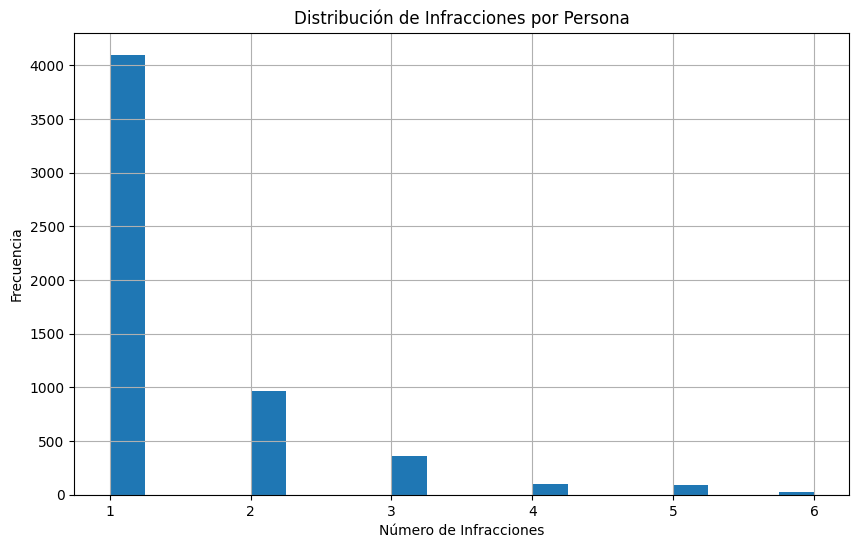

In [147]:
plt.figure(figsize=(10,6))
infracciones_filtradas.hist(bins=20)
plt.title('Distribución de Infracciones por Persona')
plt.xlabel('Número de Infracciones')
plt.ylabel('Frecuencia')
plt.show()

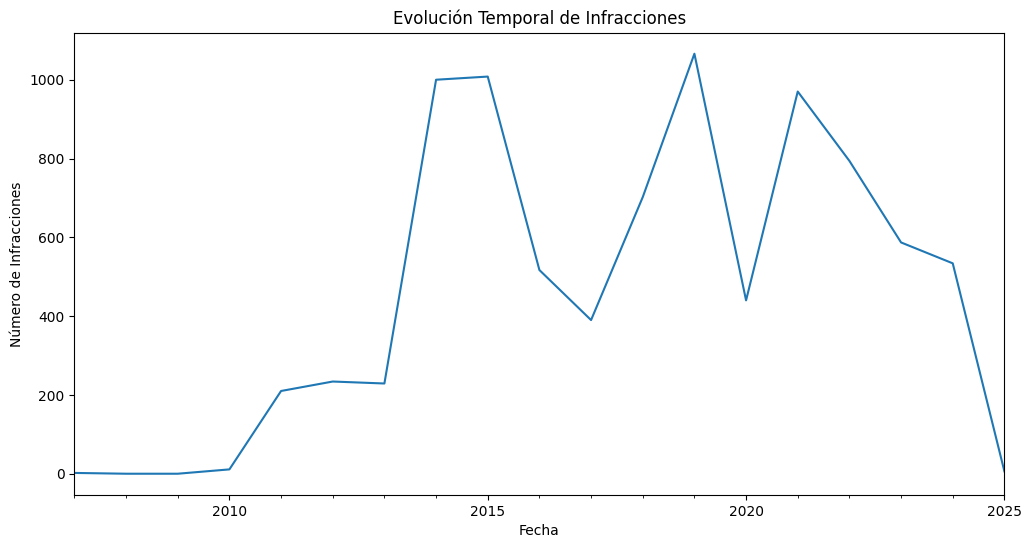

In [ ]:
plt.figure(figsize=(12,6))
df.resample('M', on='fecha_resolucion').size().plot()
plt.title('Evolución Temporal de Infracciones')
plt.xlabel('Fecha')
plt.ylabel('Número de Infracciones')
plt.show()

<Figure size 1200x600 with 0 Axes>

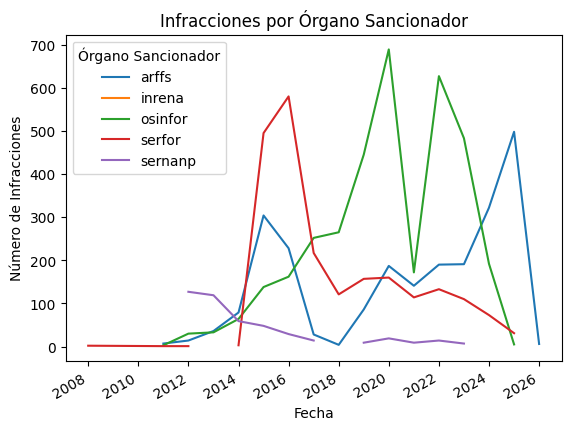

In [162]:
plt.figure(figsize=(12,6))
df.query('organo_sancionador != "nan"').groupby([pd.Grouper(key='fecha_resolucion', freq='Y'), 'organo_sancionador']).size().unstack().plot()
plt.title('Infracciones por Órgano Sancionador')
plt.xlabel('Fecha')
plt.ylabel('Número de Infracciones')
plt.legend(title='Órgano Sancionador')
plt.show()

<Figure size 1200x600 with 0 Axes>

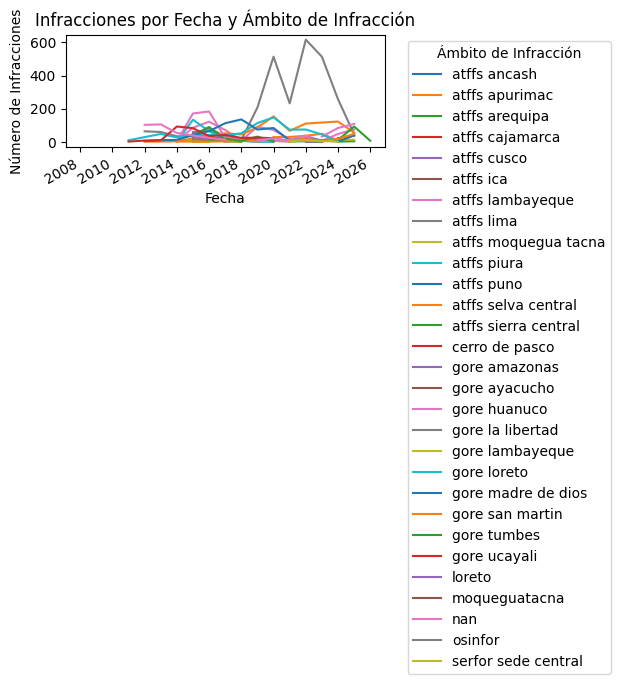

In [153]:
plt.figure(figsize=(12,6))
df.groupby([pd.Grouper(key='fecha_resolucion', freq='Y'), 'ambito_infraccion']).size().unstack().plot()
plt.title('Infracciones por Fecha y Ámbito de Infracción')
plt.xlabel('Fecha')
plt.ylabel('Número de Infracciones')
plt.legend(title='Ámbito de Infracción', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [154]:
candidatos_recurrentes = df[df['fue_candidato']==1]['documento_identidad'].value_counts()
print(f"Infractores candidatos con más de una infracción: {len(candidatos_recurrentes[candidatos_recurrentes>1])}")

Infractores candidatos con más de una infracción: 28
